In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
plt.style.use('seaborn')




In [3]:
pip install yfinance


  Using cached yfinance-0.1.63.tar.gz (26 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23907 sha256=2acfa645eae481b0574923eae96652ddf6344f947c494142e8a62afc3d75769a
  Stored in directory: /Users/AydenBae/Library/Caches/pip/wheels/ec/cc/c1/32da8ee853d742d5d7cbd11ee04421222eb354672020b57297
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=d2f50767abf43890ae8cc71bd47fc49dbd5a11e4f2692d406b85bc85880e6875
  Stored in directory: /Users/AydenBae/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf

## Basic Example

In [116]:
msft = yf.Ticker("MSFT")

In [115]:
msft.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [114]:
msft.info['totalCash']

69833998336

In [120]:
df = msft.dividends
data = df.resample('Y').sum()
data = data.reset_index()
data['Year'] = data['Date'].dt.year
data

,Date,Dividends,Year
0,2003-12-31,0.24,2003
1,2004-12-31,3.16,2004
2,2005-12-31,0.32,2005
3,2006-12-31,0.37,2006
4,2007-12-31,0.41,2007
5,2008-12-31,0.46,2008
6,2009-12-31,0.52,2009
7,2010-12-31,0.55,2010
8,2011-12-31,0.68,2011
9,2012-12-31,0.83,2012


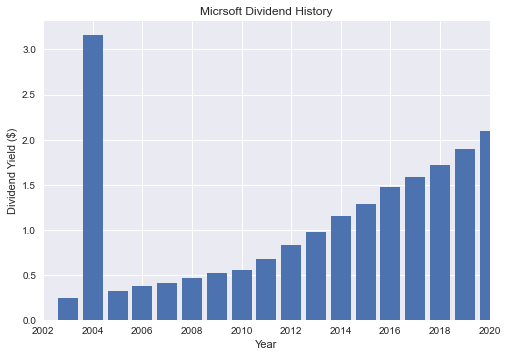

In [64]:
plt.figure()
plt.bar(data['Year'],data['Dividends'])
plt.ylabel('Dividend Yield ($)')
plt.xlabel('Year')
plt.title('Micrsoft Dividend History')
plt.xlim(2002,2020)
plt.show()

In [74]:
hist = msft.history(period='5d') #(start="2021-07-18", end=today)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-15,149.240005,150.000000,147.089996,148.479996,106820300,0,0
2021-07-16,148.460007,149.759995,145.880005,146.389999,93100300,0,0
2021-07-19,143.750000,144.070007,141.669998,142.449997,121434600,0,0
2021-07-20,143.460007,147.100006,142.960007,146.149994,96238600,0,0
2021-07-21,145.529999,146.130005,144.630005,145.399994,74993460,0,0


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

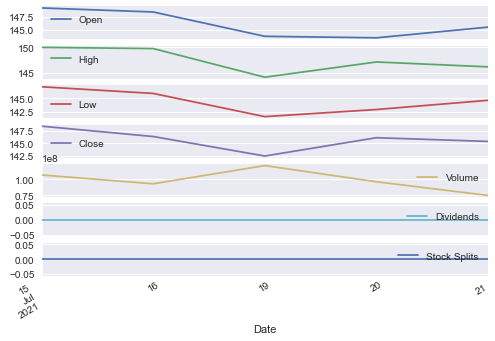

In [128]:
hist.plot(kind='line' ,subplots=True)

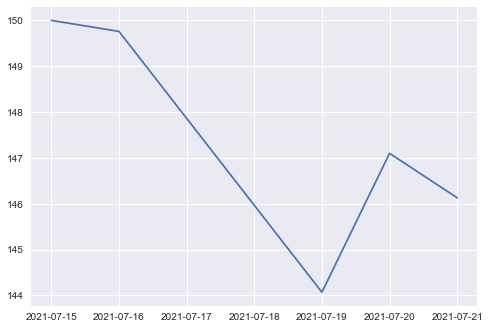

In [76]:
plt.figure()
plt.plot(hist['High'])
plt.show()

In [10]:
msft.actions #dividends, splits

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-05-20,0.51,0.0
2020-08-19,0.51,0.0
2020-11-18,0.56,0.0


In [11]:
msft.quarterly_financials

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Research Development,5.204e+09,4.899e+09,4.926e+09,5.214e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.7236e+10,1.8337e+10,1.6124e+10,1.3422e+10
Minority Interest,None,None,None,None
Net Income,1.5457e+10,1.5463e+10,1.3893e+10,1.1202e+10
Selling General Administrative,6.409e+09,6.086e+09,5.35e+09,7.073e+09
Gross Profit,2.8661e+10,2.8882e+10,2.6152e+10,2.5694e+10
Ebit,1.7048e+10,1.7897e+10,1.5876e+10,1.3407e+10
Operating Income,1.7048e+10,1.7897e+10,1.5876e+10,1.3407e+10
Other Operating Expenses,None,None,None,None


In [129]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",610849992,2021-03-30,0.0811,144020102613
1,Blackrock Inc.,518649291,2021-03-30,0.0689,122281943339
2,State Street Corporation,292575655,2021-03-30,0.0388,68980562179
3,"FMR, LLC",217585928,2021-03-30,0.0289,51300234244
4,Price (T.Rowe) Associates Inc,178824616,2021-03-30,0.0237,42161479714
5,"Geode Capital Management, LLC",120231394,2021-03-30,0.0160,28346955763
6,Capital World Investors,112150578,2021-03-30,0.0149,26441741775
7,Capital Research Global Investors,99286940,2021-03-30,0.0132,23408881843
8,Capital International Investors,90228967,2021-03-30,0.0120,21273283549
9,Northern Trust Corporation,89762724,2021-03-30,0.0119,21163357437


In [18]:
msft.balance_sheet

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Intangible Assets,7.038000e+09,7.750000e+09,8.053000e+09,1.010600e+10
Total Liab,1.830070e+11,1.842260e+11,1.761300e+11,1.626010e+11
Total Stockholder Equity,1.183040e+11,1.023300e+11,8.271800e+10,8.771100e+10
Other Current Liab,4.600100e+10,4.586000e+10,3.819500e+10,3.087900e+10
Total Assets,3.013110e+11,2.865560e+11,2.588480e+11,2.503120e+11
Common Stock,8.055200e+10,7.852000e+10,7.122300e+10,6.931500e+10
Other Current Assets,1.151700e+10,1.013300e+10,6.855000e+09,5.183000e+09
Retained Earnings,3.456600e+10,2.415000e+10,1.368200e+10,1.776900e+10
Other Liab,3.449200e+10,3.569900e+10,3.570700e+10,2.298600e+10
Good Will,4.335100e+10,4.202600e+10,3.568300e+10,3.512200e+10


In [65]:
msft.cashflow


,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Investments,6.980000e+09,5.400000e+08,6.557000e+09,-1.251100e+10
Change To Liabilities,5.230000e+09,4.694000e+09,7.070000e+09,3.901000e+09
Total Cashflows From Investing Activities,-1.222300e+10,-1.577300e+10,-6.061000e+09,-4.678100e+10
Net Borrowings,-5.518000e+09,-4.000000e+09,-1.020100e+10,3.145900e+10
Total Cash From Financing Activities,-4.603100e+10,-3.688700e+10,-3.359000e+10,8.408000e+09
Change To Operating Activities,-6.730000e+08,-1.542000e+09,-4.590000e+08,3.490000e+08
Issuance Of Stock,1.343000e+09,1.142000e+09,1.002000e+09,7.720000e+08
Net Income,4.428100e+10,3.924000e+10,1.657100e+10,2.548900e+10
Change In Cash,2.220000e+09,-5.900000e+08,4.283000e+09,1.153000e+09
Repurchase Of Stock,-2.296800e+10,-1.954300e+10,-1.072100e+10,-1.178800e+10


In [24]:
msft.earnings


,Revenue,Earnings
Year,,
2017,96571000000,25489000000
2018,110360000000,16571000000
2019,125843000000,39240000000
2020,143015000000,44281000000


In [25]:
msft.recommendations


,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-06-23 11:22:46,Wedbush,Outperform,,main
2021-06-28 12:12:53,Jefferies,Buy,,main
2021-07-16 11:40:23,Mizuho,Buy,,main


In [28]:
msft.recommendations['To Grade'].value_counts()

Buy               100
Overweight         70
Outperform         65
Neutral            37
Hold               14
Market Perform     10
Sell               10
Strong Buy          9
Underperform        6
Equal-Weight        6
Sector Perform      2
Underweight         2
Perform             1
Long-Term Buy       1
                    1
Name: To Grade, dtype: int64

## Adv. Financial Data Gathering

In [16]:
import requests
from bs4 import BeautifulSoup

url = "https://finance.yahoo.com/world-indices/"
res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')

table = soup.find_all('table') # Select the table you're interested in
df = pd.read_html(str(table))[0]
indices=df
indices

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,4358.69,35.63,+0.82%,2.137B,NaN,NaN,NaN
1,^DJI,Dow Jones Industrial Average,34798.00,286.01,+0.83%,327.186M,NaN,NaN,NaN
2,^IXIC,NASDAQ Composite,14631.95,133.08,+0.92%,3.75B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),16503.47,181.53,+1.11%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,2985.13,50.21,+1.71%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100,697.48,12.55,+1.83%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,2234.04,39.74,+1.81%,0,NaN,NaN,NaN
7,^VIX,Vix,17.91,-1.82,-9.22%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,6998.28,117.15,+1.70%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,15422.50,206.23,+1.36%,0,NaN,NaN,NaN


In [44]:
tickerlist=indices['Symbol'].str.replace("^","").str.lower().to_list()

['gspc',
 'dji',
 'ixic',
 'nya',
 'xax',
 'buk100p',
 'rut',
 'vix',
 'ftse',
 'gdaxi',
 'fchi',
 'stoxx50e',
 'n100',
 'bfx',
 'imoex.me',
 'n225',
 'hsi',
 '000001.ss',
 '399001.sz',
 'sti',
 'axjo',
 'aord',
 'bsesn',
 'jkse',
 'klse',
 'nz50',
 'ks11',
 'twii',
 'gsptse',
 'bvsp',
 'mxx',
 'ipsa',
 'merv',
 'ta125.ta',
 'case30',
 'jn0u.jo']

In [21]:
df = yf.download(tickerlist,period ="1d", start="2020-01-13", end="2021-07-18")

[*********************100%***********************]  36 of 36 completed

29 Failed downloads:
- FTSE: No data found, symbol may be delisted
- STOXX50E: No data found, symbol may be delisted
- N100: No data found, symbol may be delisted
- BFX: No data found for this date range, symbol may be delisted
- GSPTSE: No data found, symbol may be delisted
- JKSE: No data found, symbol may be delisted
- TA125.TA: No data found, symbol may be delisted
- MERV: No data found, symbol may be delisted
- GDAXI: No data found, symbol may be delisted
- KLSE: No data found for this date range, symbol may be delisted
- IXIC: No data found, symbol may be delisted
- CASE30: No data found, symbol may be delisted
- RUT: No data found for this date range, symbol may be delisted
- AORD: No data found, symbol may be delisted
- BUK100P: No data found, symbol may be delisted
- IPSA: No data found, symbol may be delisted
- FCHI: No data found, symbol may be delisted
- JN0U.JO: No data found, symbol may be delisted
- 

In [22]:
df

Adj Close                                                        \
              000001.SS     399001.SZ AORD AXJO BFX BSESN BUK100P BVSP CASE30   
Date                                                                            
2020-01-13  3115.570068  11040.200195  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2020-01-14  3106.820068  10988.769531  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2020-01-15  3090.040039  10972.320312  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2020-01-16  3074.081055  10967.440430  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2020-01-17  3075.496094  10954.389648  NaN  NaN NaN   NaN     NaN  NaN    NaN   
...                 ...           ...  ...  ...  ..   ...     ...  ...    ...   
2021-07-12  3547.840088  15161.519531  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2021-07-13  3566.520020  15189.290039  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2021-07-14  3528.500000  15056.320312  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2021-07-15  3564.590088  15169.330078  NaN  NaN NaN   NaN     NaN  NaN    NaN   
2021-07-16  3539.300049  14972.209961  NaN  NaN NaN   NaN     NaN  NaN    NaN   

                          ... Volume                                           \
                     DJI  ...   N225  NYA NZ50 RUT STI STOXX50E TA125.TA TWII   
Date                      ...                                                   
2020-01-13  28907.099609  ...    NaN  0.0  NaN NaN NaN      NaN      NaN  NaN   
2020-01-14  28939.699219  ...    NaN  NaN  NaN NaN NaN      NaN      NaN  NaN   
2020-01-15  29030.199219  ...    NaN  NaN  NaN NaN NaN      NaN      NaN  NaN   
2020-01-16  29297.599609  ...    NaN  NaN  NaN NaN NaN      NaN      NaN  NaN   
2020-01-17  29348.099609  ...    NaN  0.0  NaN NaN NaN      NaN      NaN  NaN   
...                  ...  ...    ...  ...  ...  ..  ..      ...      ...  ...   
2021-07-12  34996.199219  ...    NaN  0.0  NaN NaN NaN      NaN      NaN  NaN   
2021-07-13  34888.800781  ...    NaN  0.0  NaN NaN NaN      NaN      NaN  NaN   
2021-07-14  34933.199219  ...    NaN  0.0  NaN NaN NaN      NaN      NaN  NaN   
2021-07-15  34987.000000  ...    NaN  0.0  NaN NaN NaN      NaN      NaN  NaN   
2021-07-16  34687.898438  ...    NaN  0.0  NaN NaN NaN      NaN      NaN  NaN   

                     
           VIX  XAX  
Date                 
2020-01-13 NaN  0.0  
2020-01-14 NaN  NaN  
2020-01-15 NaN  NaN  
2020-01-16 NaN  NaN  
2020-01-17 NaN  0.0  
...         ..  ...  
2021-07-12 NaN  NaN  
2021-07-13 NaN  NaN  
2021-07-14 NaN  NaN  
2021-07-15 NaN  NaN  
2021-07-16 NaN  NaN  

[394 rows x 216 columns]

In [32]:
adj_close = df.dropna(thresh = 10, axis =1)['Adj Close']
adj_close.head()

,000001.SS,399001.SZ,DJI,HSI,IMOEX.ME,NYA,XAX
Date,,,,,,,
2020-01-13 00:00:00,3115.570068,11040.200195,28907.099609,NaN,3151.689941,14042.599609,2576.770020
2020-01-14 00:00:00,3106.820068,10988.769531,28939.699219,NaN,3129.770020,NaN,NaN
2020-01-15 00:00:00,3090.040039,10972.320312,29030.199219,NaN,3132.629883,NaN,NaN
2020-01-16 00:00:00,3074.081055,10967.440430,29297.599609,NaN,3157.229980,NaN,NaN
2020-01-17 00:00:00,3075.496094,10954.389648,29348.099609,NaN,3196.879883,14183.200195,2622.090088


In [37]:
adj_close.describe().T

,count,mean,std,min,25%,50%,75%,max
000001.SS,366.0,3267.937879,269.412504,2660.169922,2988.779236,3359.924561,3473.894714,3696.167969
399001.SZ,366.0,13113.410114,1626.185232,9691.530273,11407.812256,13656.845215,14210.309814,15962.250000
DJI,364.0,28997.545920,3687.361529,18591.900391,26530.099609,28964.699219,31521.949219,34996.199219
HSI,350.0,26412.377718,2109.413524,21696.099609,24554.875000,26313.599609,28481.350098,31084.900391
IMOEX.ME,379.0,3125.360237,406.265661,2112.639893,2798.025024,3079.739990,3470.954956,3895.100098
NYA,346.0,13694.884816,1921.660856,8777.379883,12383.574951,13765.449707,15345.000000,16708.699219
XAX,55.0,2091.009624,391.203394,1487.229980,1732.345032,2261.629883,2425.039917,2622.090088


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

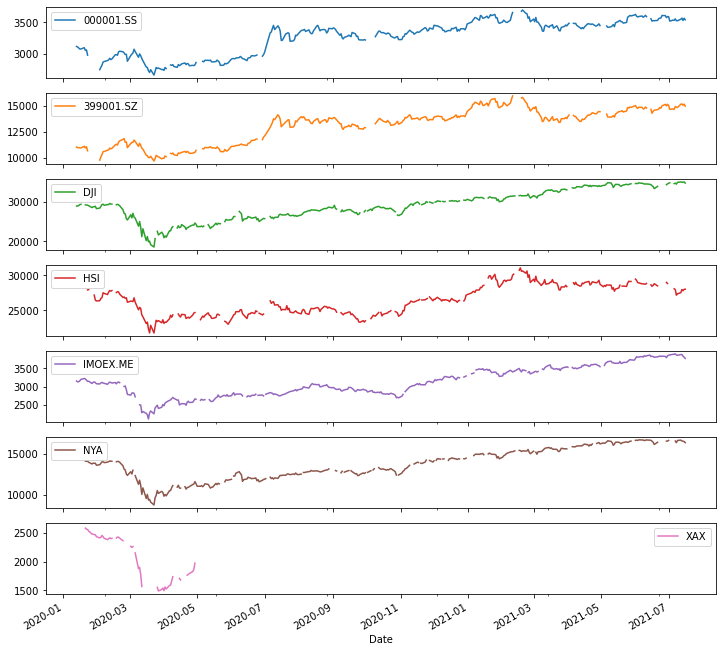

In [40]:
adj_close.plot(figsize=(12,12),subplots=True)

In [42]:
# will drop XAX due to lack of visibility
adj_close = adj_close.drop("XAX", axis =1)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

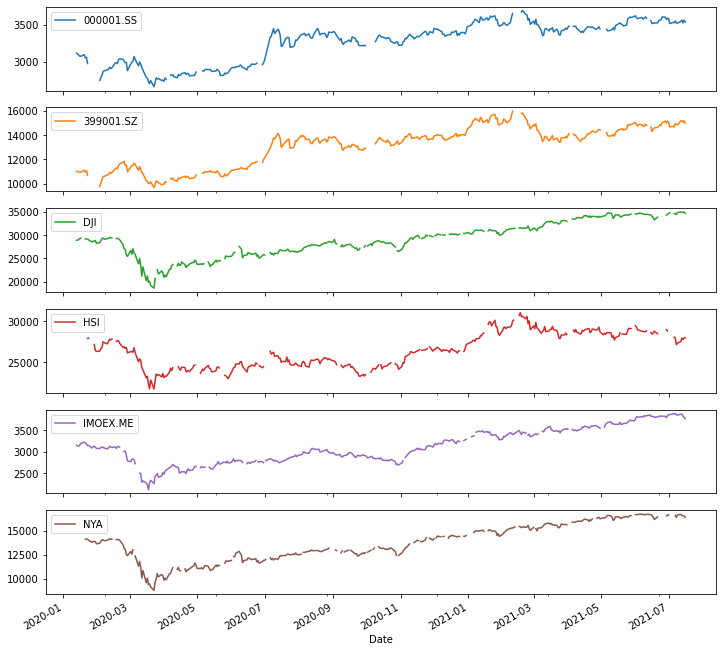

In [43]:
adj_close.plot(figsize=(12,12),subplots=True)

In [47]:
dji = adj_close['DJI']


<bound method NDFrame.head of Date
2020-01-13    28907.099609
2020-01-14    28939.699219
2020-01-15    29030.199219
2020-01-16    29297.599609
2020-01-17    29348.099609
                  ...     
2021-07-12    34996.199219
2021-07-13    34888.800781
2021-07-14    34933.199219
2021-07-15    34987.000000
2021-07-16    34687.898438
Name: DJI, Length: 394, dtype: float64>

In [48]:
dji.resample("4M").mean()

Date
2020-01-31    28940.228516
2020-05-31    24611.986401
2020-09-30    26987.780779
2021-01-31    29529.720855
2021-05-31    32940.269484
2021-09-30    34503.864118
Freq: 4M, Name: DJI, dtype: float64

In [49]:
dji.shift(1)

Date
2020-01-13             NaN
2020-01-14    28907.099609
2020-01-15    28939.699219
2020-01-16    29030.199219
2020-01-17    29297.599609
                  ...     
2021-07-12    34870.199219
2021-07-13    34996.199219
2021-07-14    34888.800781
2021-07-15    34933.199219
2021-07-16    34987.000000
Name: DJI, Length: 394, dtype: float64

In [50]:
dji_change = dji / (dji.shift(1)-1)

<AxesSubplot:xlabel='Date'>

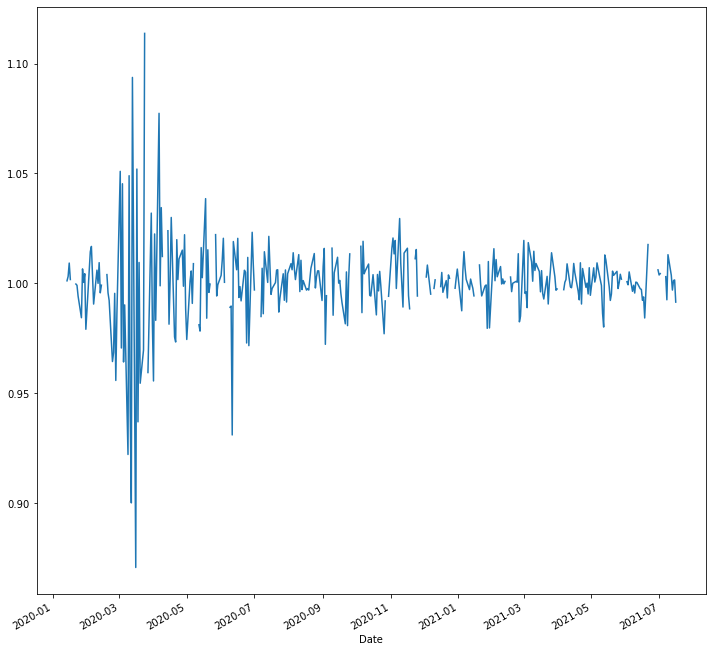

In [51]:
dji_change.plot(figsize=(12,12))

<AxesSubplot:>

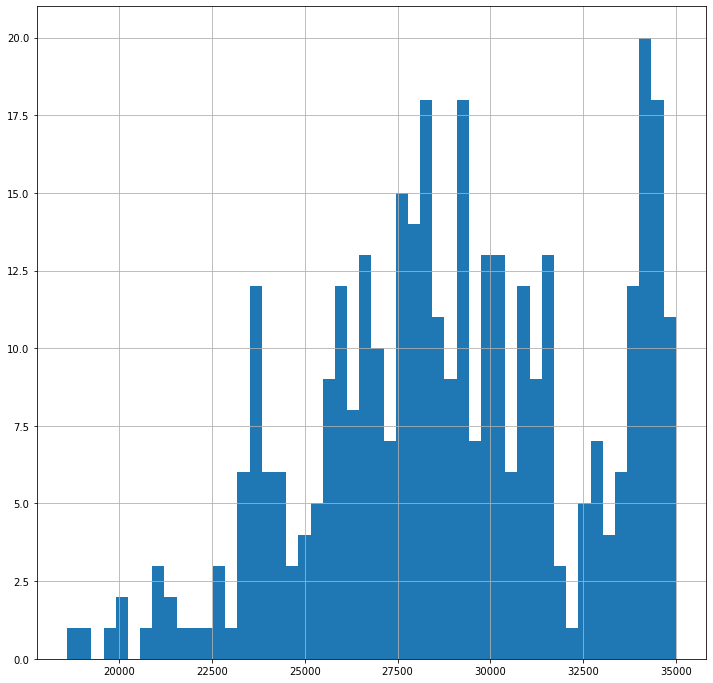

In [53]:
dji.hist(bins=50, figsize=(12,12))

## Real Life Example




In [80]:
security = yf.Ticker('djia')

In [88]:
today = datetime.now().date().strftime('%Y-%m-%d')

In [89]:
df = security.history(start = '2005-01-01', end=today)

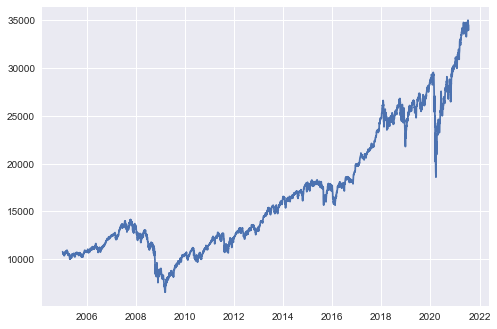

In [90]:
plt.figure()
plt.plot(df['Close'])
plt.show()

#### The two dips shown in the plot can be due to recession in 2008 and the COVID pandemic in 2020

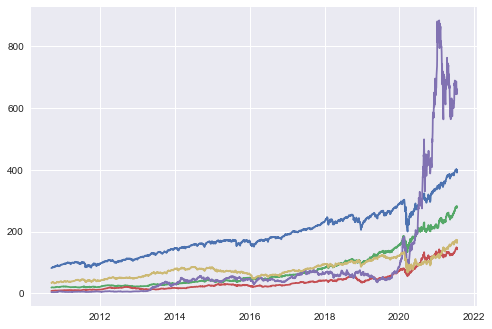

In [102]:
securities = ['voo', 'msft', 'aapl', 'tsla', 'axp']
df = pd.DataFrame()
for item in securities:
    df[item] = yf.Ticker(item).history(start='2005-01-01', end=today)['Close']
    
plt.figure
plt.plot(df)
plt.show()